**911 Calls Capstone Project**
The data contains the following fields:

lat : String variable, Latitude

lng: String variable, Longitude

desc: String variable, Description of the Emergency Call

zip: String variable, Zipcode

title: String variable, Title

timeStamp: String variable, YYYY-MM-DD HH:MM:SS

twp: String variable, Township

addr: String variable, Address

e: String variable, Dummy variable (always 1)


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('911.csv')

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
# the top 5 zipcodes for 911 calls
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [ ]:
# the top 5 townships (twp) for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [ ]:
# how many unique title codes are in the 'title' column
df['title'].nunique()

110

In [ ]:
# In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
# df['Departments'] = df['title'].apply(lambda x: x.split(':')[1])
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [ ]:
# the most common Reason for a 911 call based off of this new column
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


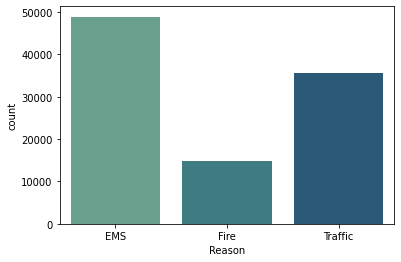

In [ ]:
# create a countplot of 911 calls by Reason
sns.countplot(df['Reason'], palette='crest')

In [ ]:
# the data type of the objects in the timeStamp column
(type(df['timeStamp'][0]))

str

In [ ]:
# convert the column from strings to DateTime objects
df['date'] = pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S')
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.dayofweek)
df['hour'] = df['date'].apply(lambda x: x.hour)
df.head(20)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,date,month,day,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,12,3,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,12,3,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,12,3,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,12,3,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,12,3,17
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,2015-12-10 17:40:01,12,3,17
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,2015-12-10 17:40:01,12,3,17
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,2015-12-10 17:40:01,12,3,17
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,2015-12-10 17:40:01,12,3,17
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,2015-12-10 17:40:01,12,3,17


In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day'] = df['day'].map(dmap)
df['day']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: day, Length: 99492, dtype: object

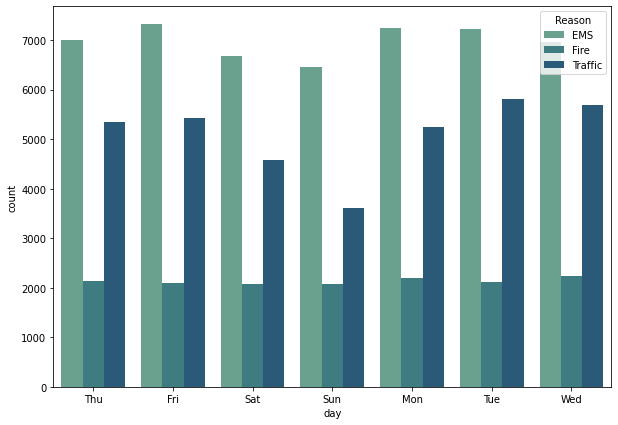

In [ ]:
# create a countplot of the Day of Week column with the hue based off of the Reason column
ax = plt.subplots(figsize = (10,7))
sns.countplot(x=df['day'], hue=df['Reason'], palette='crest')

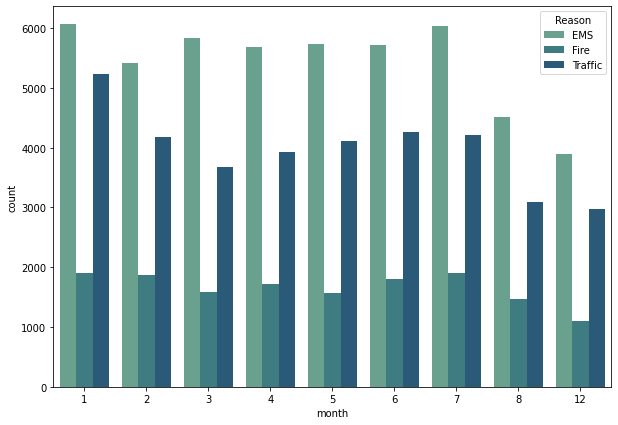

In [ ]:
# the same for Month
ax = plt.subplots(figsize = (10,7))
sns.countplot(x=df['month'], hue=df['Reason'], palette='crest')

In [ ]:
# create a groupby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. 
byMonth = df.groupby(df['month'])
df['months'] = byMonth.count().reset_index().month
months = byMonth.count().reset_index().month
byMonth.count().reset_index()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,date,day,hour
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


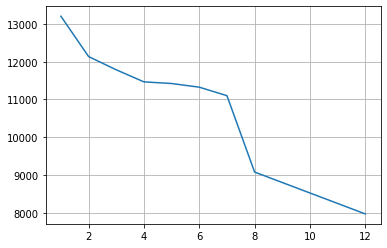

In [ ]:
# create a simple plot off of the dataframe indicating the count of calls per month. 
plt.plot(months, df['month'].value_counts())
plt.grid()

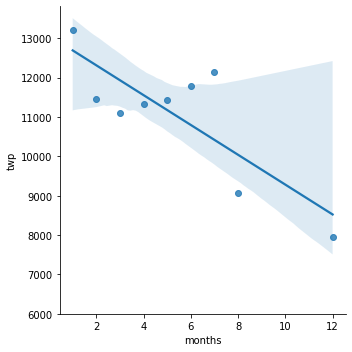

In [ ]:
# use seaborn's lmplot() to create a linear fit on the number of calls per month
df['months'] = df['months'].fillna(0).astype(int)
df['twp'] = byMonth.count().reset_index().twp
g = sns.lmplot(x='months', y='twp', data=df, height=5, aspect=1)
g.set(ylim=(6000, None))

In [ ]:
# Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.
df['Date'] = pd.to_datetime(df['timeStamp']).dt.date
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

Text(0.5, 0, 'Date')

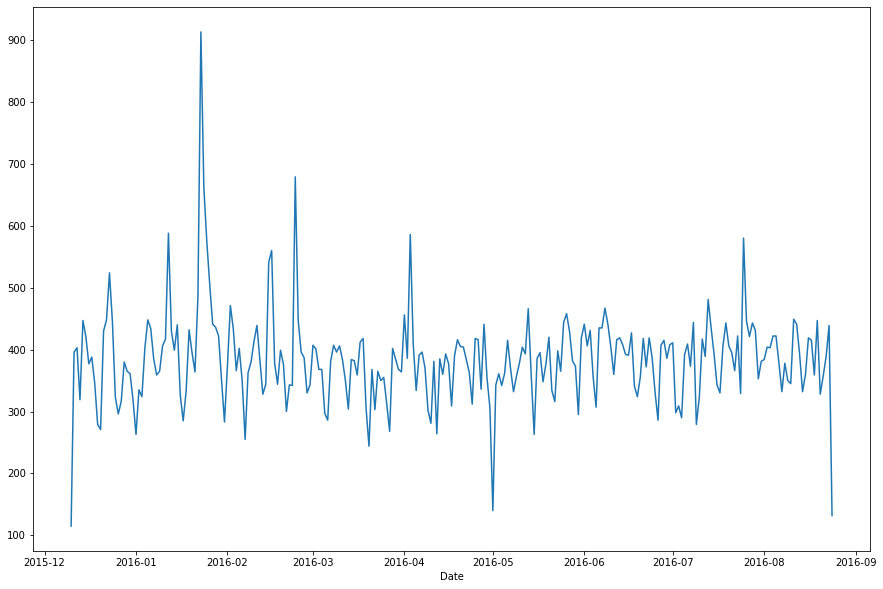

In [ ]:
# groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.
groupedDate = df.groupby('Date')
date = groupedDate.count().reset_index().Date
counts = groupedDate.count().reset_index().e
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(date, counts)
plt.xlabel('Date')

In [ ]:
#  recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call
greas = df.groupby('Reason').count().reset_index()
greas

,Reason,lat,lng,desc,zip,title,timeStamp,twp,addr,e,date,month,day,hour,months,Date
0,EMS,48877,48877,48877,44327,48877,48877,8,48877,48877,48877,48877,48877,48877,48877,48877
1,Fire,14920,14920,14920,13012,14920,14920,1,14900,14920,14920,14920,14920,14920,14920,14920
2,Traffic,35695,35695,35695,29298,35695,35695,0,35196,35695,35695,35695,35695,35695,35695,35695


In [ ]:
# restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week
df['day']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: day, Length: 99492, dtype: object

In [ ]:
new = df.groupby(['day', 'hour']).agg({'e':'sum'})
new_us = new.unstack()
new_us

e                                               ...                  \
hour   0    1    2    3    4    5    6    7    8    9   ...   14   15    16   
day                                                     ...                   
Fri   275  235  191  175  201  194  372  598  742  752  ...  932  980  1039   
Mon   282  221  201  194  204  267  397  653  819  786  ...  869  913   989   
Sat   375  301  263  260  224  231  257  391  459  640  ...  789  796   848   
Sun   383  306  286  268  242  240  300  402  483  620  ...  684  691   663   
Thu   278  202  233  159  182  203  362  570  777  828  ...  876  969   935   
Tue   269  240  186  170  209  239  415  655  889  880  ...  943  938  1026   
Wed   250  216  189  209  156  255  410  701  875  808  ...  904  867   990   

                                          
hour    17   18   19   20   21   22   23  
day                                       
Fri    980  820  696  667  559  514  474  
Mon    997  885  746  613  497  472  325  
Sat    757  778  696  628  572  506  467  
Sun    714  670  655  537  461  415  330  
Thu   1013  810  698  617  553  424  354  
Tue   1019  905  731  647  571  462  274  
Wed   1037  894  686  668  575  490  335  

[7 rows x 24 columns]

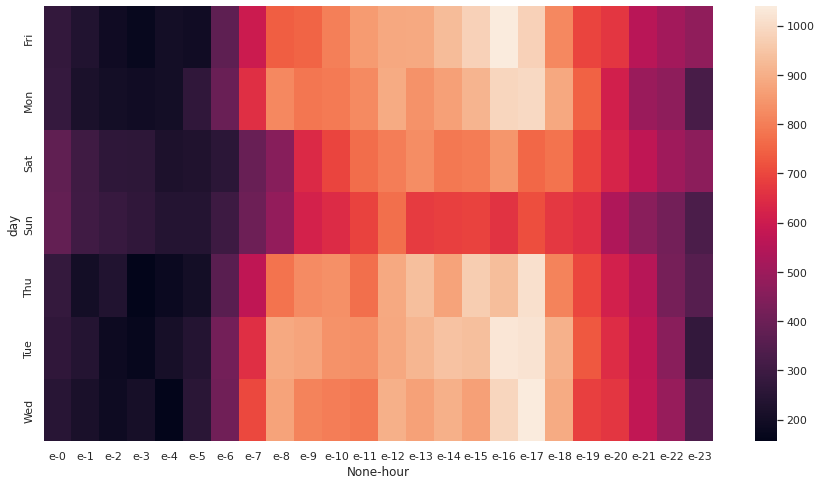

In [ ]:
# create a HeatMap using this new DataFrame
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(new_us)

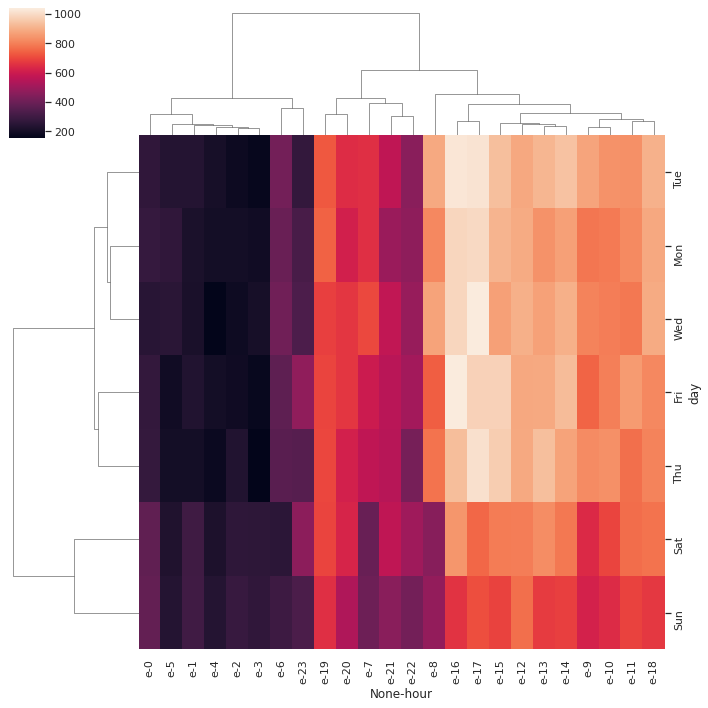

In [ ]:
# create a clustermap using this DataFrame
sns.clustermap(new_us)

In [ ]:
# repeat these same plots and operations, for a DataFrame that shows the Month as the column.
new = df.groupby(['day', 'month']).agg({'e':'sum'})
new_us = new.unstack()
new_us

e                                                
month    1     2     3     4     5     6     7     8     12
day                                                        
Fri    1970  1581  1525  1958  1730  1649  2045  1310  1065
Mon    1727  1964  1535  1598  1779  1617  1692  1511  1257
Sat    2291  1441  1266  1734  1444  1388  1695  1099   978
Sun    1960  1229  1102  1488  1424  1333  1672  1021   907
Thu    1584  1596  1900  1601  1590  2065  1646  1230  1266
Tue    1973  1753  1884  1430  1918  1676  1670  1612  1234
Wed    1700  1903  1889  1517  1538  2058  1717  1295  1262

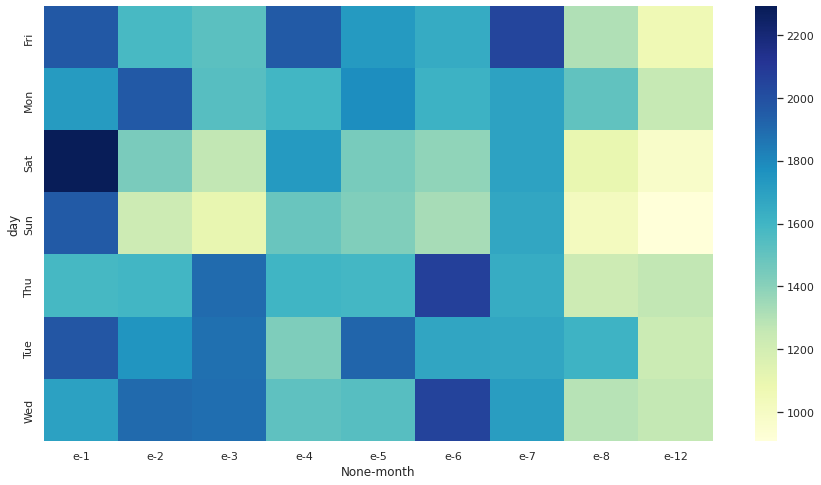

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(new_us, cmap="YlGnBu")

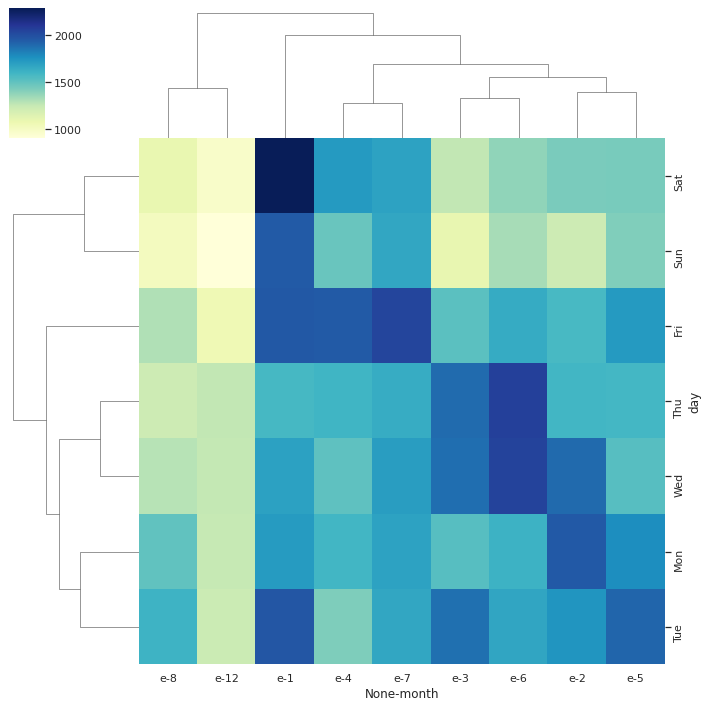

In [ ]:
sns.clustermap(new_us, cmap="YlGnBu")